# Install Dependencies

In [1]:
# Initial imports
import numpy as np
import pandas as pd
from path import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import tensorflow as tf

# Reproducibility
tf.random.set_seed(42)

# Ignore non-important Warnings
import logging 
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Import and Clean Data

In [2]:
# Read in data
data = Path("../Resources/mpg.csv")
df = pd.read_csv(data, na_values='?')

# Drop rows with missing values
df.dropna(inplace=True)

# Drop 'car name' column
df = df.drop(["car name"],1)

# Convert 'origin' to a string
df['origin'] = df['origin'].astype(str) 

# Encode Categorical Data

In [3]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[["origin"]]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(["origin"])

# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop("origin",1)

# Train Test Split

In [4]:
# Split our preprocessed data into our features and target arrays
y = df["mpg"].values
X = df.drop(["mpg"],1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Calculate the `mean` and `std` for each feature
X_train.describe().transpose()[['mean', 'std']]

,mean,std
cylinders,5.501730,1.697884
displacement,195.065744,103.898150
horsepower,104.795848,37.822913
weight,2975.494810,848.956590
acceleration,15.482007,2.689554
model year,76.000000,3.540441
origin_1,0.605536,0.489583
origin_2,0.190311,0.393228
origin_3,0.204152,0.403780


# Visualize Relationships

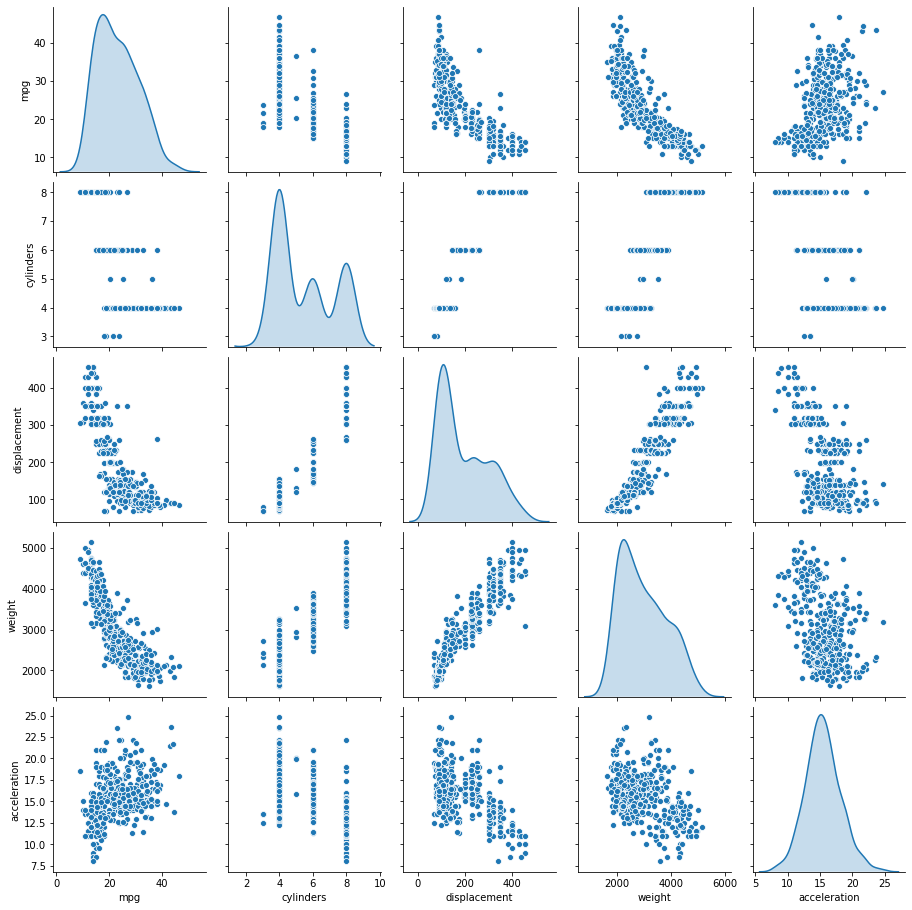

In [5]:
# Create a pairplot ot visualize the relationship between features
sns.pairplot(df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']], diag_kind='kde')

# Standardize Data

In [6]:
# Initialize and fit the scaler object
scaler = StandardScaler().fit(X_train)

In [7]:
# Scale train and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Scaled Neural Network

In [8]:
# Create model instance
nn = Sequential()

# Define the model - shallow neural net
number_input_features = 9
number_hidden_nodes = number_input_features * 3

# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)

# Output layer
nn.add(
    Dense(units=1, activation="linear")
)

# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_2 = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
10/10 [==============================] - 0s 955us/step - loss: 584.3298 - mse: 584.3298
Epoch 2/200
10/10 [==============================] - 0s 1ms/step - loss: 574.5405 - mse: 574.5405
Epoch 3/200
10/10 [==============================] - 0s 2ms/step - loss: 565.0287 - mse: 565.0287
Epoch 4/200
10/10 [==============================] - 0s 1ms/step - loss: 555.7529 - mse: 555.7529
Epoch 5/200
10/10 [==============================] - 0s 1ms/step - loss: 546.2404 - mse: 546.2404
Epoch 6/200
10/10 [==============================] - 0s 2ms/step - loss: 536.7668 - mse: 536.7668
Epoch 7/200
10/10 [==============================] - 0s 2ms/step - loss: 527.4706 - mse: 527.4706
Epoch 8/200
10/10 [==============================] - 0s 1ms/step - loss: 517.8531 - mse: 517.8531
Epoch 9/200
10/10 [==============================] - 0s 1ms/step - loss: 507.5913 - mse: 507.5913
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 497.0970 - mse: 497.0970
Epoch 11/200
10/1

10/10 [==============================] - 0s 1ms/step - loss: 10.1782 - mse: 10.1782
Epoch 168/200
10/10 [==============================] - 0s 1ms/step - loss: 10.1132 - mse: 10.1132
Epoch 169/200
10/10 [==============================] - 0s 931us/step - loss: 10.0660 - mse: 10.0660
Epoch 170/200
10/10 [==============================] - 0s 1ms/step - loss: 10.0010 - mse: 10.0010
Epoch 171/200
10/10 [==============================] - 0s 1ms/step - loss: 9.9263 - mse: 9.9263
Epoch 172/200
10/10 [==============================] - 0s 923us/step - loss: 9.8851 - mse: 9.8851
Epoch 173/200
10/10 [==============================] - 0s 926us/step - loss: 9.8152 - mse: 9.8152
Epoch 174/200
10/10 [==============================] - 0s 5ms/step - loss: 9.7695 - mse: 9.7695
Epoch 175/200
10/10 [==============================] - 0s 1ms/step - loss: 9.7242 - mse: 9.7242
Epoch 176/200
10/10 [==============================] - 0s 1ms/step - loss: 9.6804 - mse: 9.6804
Epoch 177/200
10/10 [===================

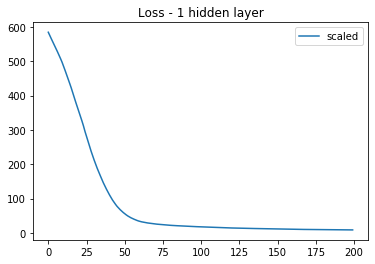

In [9]:
# Plot the loss function
plt.plot(model_2.history["loss"])
plt.title("Loss - 1 hidden layer")
plt.legend(["scaled"])

In [10]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=0)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 9.36701774597168, Accuracy: 9.36701774597168


In [11]:
# Calculate the r squared score
predictions = nn.predict(X_test_scaled)
scale_nn_R2 = r2_score(y_test, predictions)
print("R Squared: ", scale_nn_R2)

R Squared:  0.8420379749257055


# Deep Neural Net

In [12]:
# Create model instance

# Define the model - shallow neural net

# Hidden layer

# Second Hidden Layer

# Output layer


In [13]:
#Summary 


In [14]:
# Compile the model

# Train the model


In [15]:
# Plot the loss function


In [16]:
# Evaluate the model using the test data


In [17]:
# Calculate the R Squared


In [18]:
# Plot the loss function
